<a href="https://colab.research.google.com/github/r-dube/fakejobs/blob/main/fj_roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the modules used
import numpy as np
import scipy as sci
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [2]:
# Uncomment to load results from csv files
from google.colab import drive
drive.mount('/content/drive')

fcnn_file = '/content/drive/My Drive/Results/fcnn.csv'
lstm_file = '/content/drive/My Drive/Results/lstm.csv'
transformer_file = '/content/drive/My Drive/Results/transformer.csv'
logistic_file = '/content/drive/My Drive/Results/logistic.csv'

df_fcnn = pd.read_csv(fcnn_file)
df_lstm = pd.read_csv(lstm_file)
df_transformer = pd.read_csv(transformer_file)
df_logistic = pd.read_csv(logistic_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Sanity check loaded data
# Create dataset for ROC
df_fcnn = df_fcnn[['fraudulent', 'fcnn']]
# print(df_fcnn.head())
df_lstm = df_lstm[['lstm']]
# print(df_lstm.head())
df_transformer = df_transformer[['transformer']]
# print(df_transformer.head())
df_logistic = df_logistic[['logistic']]
# print(df_logistic.head())
df = pd.concat([df_fcnn, df_lstm, df_transformer, df_logistic], axis=1)
print(df.head())

   fraudulent          fcnn      lstm   transformer      logistic
0           0  2.095921e-10  0.000002  6.238354e-07  2.228161e-05
1           0  3.895740e-09  0.000018  9.412836e-07  3.750577e-03
2           0  1.250730e-13  0.000035  5.618517e-07  4.887090e-05
3           0  1.283309e-14  0.000001  3.591958e-07  2.149328e-08
4           0  1.278826e-12  0.000003  4.954410e-07  7.783772e-06


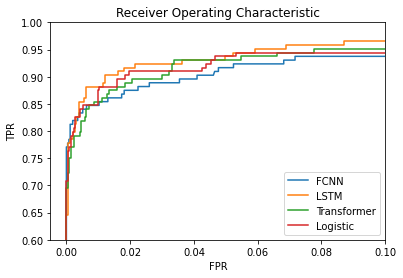

In [4]:
fpr1, tpr1, thresholds1 = roc_curve(df['fraudulent'], df['fcnn'])
fpr2, tpr2, thresholds2 = roc_curve(df['fraudulent'], df['lstm'])
fpr3, tpr3, thresholds3 = roc_curve(df['fraudulent'], df['transformer'])
fpr4, tpr4, thresholds4 = roc_curve(df['fraudulent'], df['logistic'])

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "FCNN")
plt.plot(fpr2, tpr2, label= "LSTM")
plt.plot(fpr3, tpr3, label= "Transformer")
plt.plot(fpr4, tpr4, label= "Logistic")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.xlim(-0.005, 0.1)
plt.ylim(0.6, 1)
plt.show()